**LOADING NECESSARY LIBRARY**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**DATA PROCESSING AND CLEANING**

In [8]:
# Load data
Covid_data = pd.read_csv("country_wise_latest.csv")
Covid_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
# Data Cleaning
# Remove unnecessary columns
Covid_data_clean = Covid_data.drop(columns=["Confirmed last week", "1 week change", "1 week % increase"])
Covid_data_clean.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,Africa


In [10]:
# Handle missing values - Replace NaNs in numeric columns with 0
Covid_data_clean.fillna(0, inplace=True)

In [11]:
# Ensure correct data types
Covid_data_clean['Confirmed'] = pd.to_numeric(Covid_data_clean['Confirmed'], errors='coerce')
Covid_data_clean['Deaths'] = pd.to_numeric(Covid_data_clean['Deaths'], errors='coerce')
Covid_data_clean['Recovered'] = pd.to_numeric(Covid_data_clean['Recovered'], errors='coerce')
Covid_data_clean['Active'] = pd.to_numeric(Covid_data_clean['Active'], errors='coerce')

In [12]:
# Check for duplicates (if needed)
Covid_data_clean.drop_duplicates(subset=['Country/Region'], inplace=True)

In [13]:
# Check the result
Covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  WHO Region              187 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 17.7+ KB


**EXPLORATORY DATA ANALYSIS (EDA)**

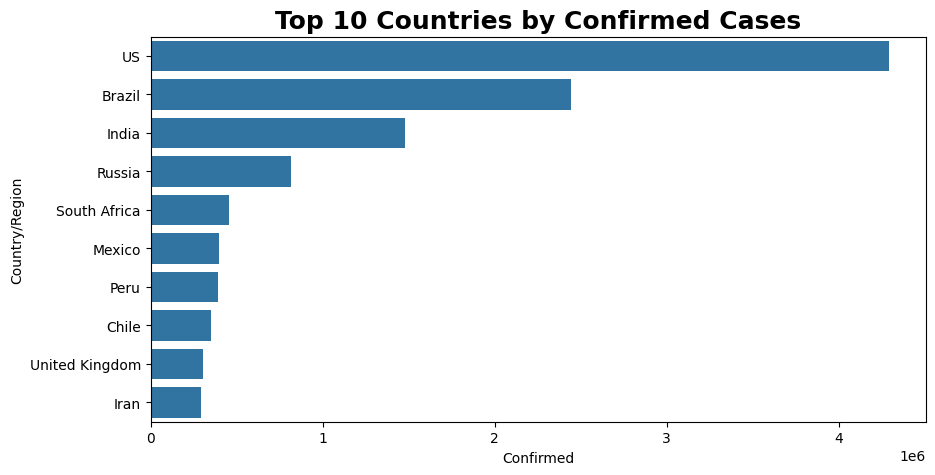

In [14]:
# Visualization using Bar Plot

# Bar plot: Total Confirmed, Deaths, Recovered, Active cases per country
plt.figure(figsize=(10,5))
Covid_data_top10 = Covid_data_clean.nlargest(10, 'Confirmed')
sns.barplot(x='Confirmed', y='Country/Region', data=Covid_data_top10)

# Customize the plot with a title and other properties
plt.title("Top 10 Countries by Confirmed Cases", fontsize =18, fontweight = 'bold')
plt.show()

In [15]:
# Sort the dataset by 'Deaths / 100 Cases' in descending order
high_mortality = Covid_data_clean.sort_values(by='Deaths / 100 Cases', ascending=False)

# Display the top 10 countries with the highest mortality rates
top_10_mortality = high_mortality[['Country/Region', 'Deaths / 100 Cases']].head(10)
top_10_mortality

,Country/Region,Deaths / 100 Cases
184,Yemen,28.56
177,United Kingdom,15.19
16,Belgium,14.79
85,Italy,14.26
61,France,13.71
77,Hungary,13.40
120,Netherlands,11.53
111,Mexico,11.13
157,Spain,10.44
183,Western Sahara,10.00


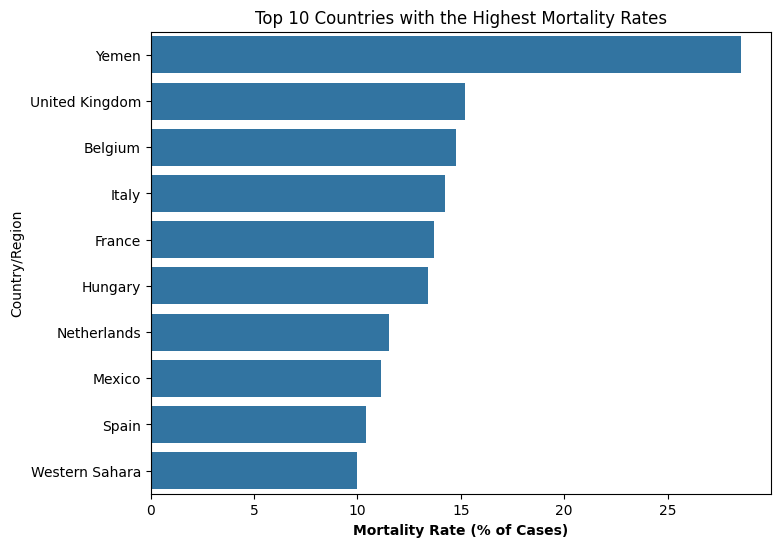

In [16]:
# Plot the top 10 countries with the highest mortality rate
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_mortality, x='Deaths / 100 Cases', y='Country/Region')
plt.title('Top 10 Countries with the Highest Mortality Rates')
plt.xlabel('Mortality Rate (% of Cases)', fontweight='bold')
plt.ylabel('Country/Region')
plt.show()

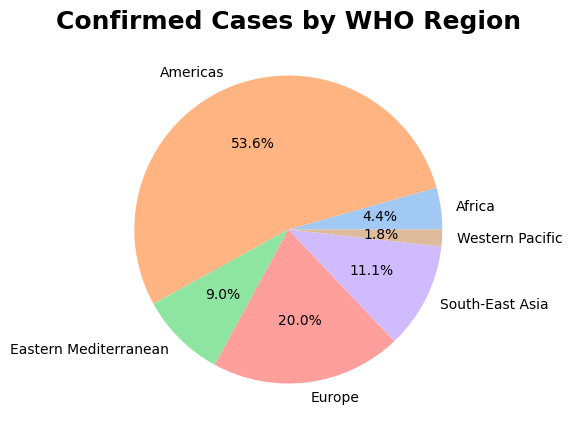

In [17]:
# Pie chart: Distribution of WHO Regions in terms of confirmed cases
plt.figure(figsize=(5,5))
region_data = Covid_data_clean.groupby('WHO Region')['Confirmed'].sum()
region_data.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Confirmed Cases by WHO Region', fontsize =18, fontweight = 'bold')
plt.ylabel('')
plt.show()


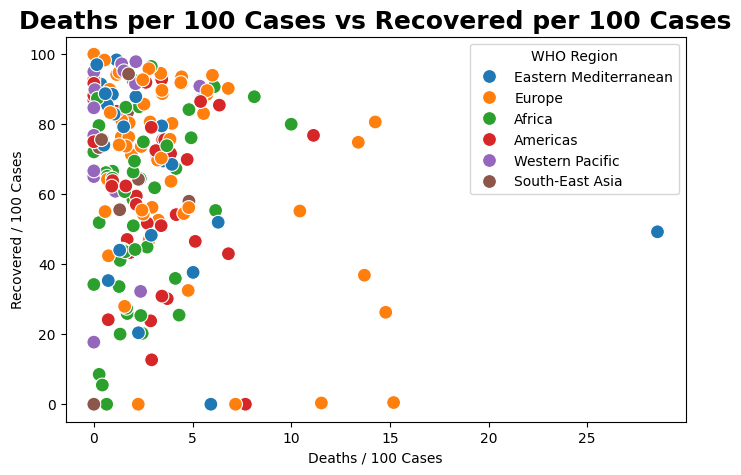

In [18]:
# Scatter plot: Deaths / 100 Cases vs Recovered / 100 Cases
plt.figure(figsize=(8,5))
sns.scatterplot(x='Deaths / 100 Cases', y='Recovered / 100 Cases', data=Covid_data_clean, hue='WHO Region', s=100)
plt.title('Deaths per 100 Cases vs Recovered per 100 Cases',fontsize =18, fontweight = 'bold' )
plt.show()

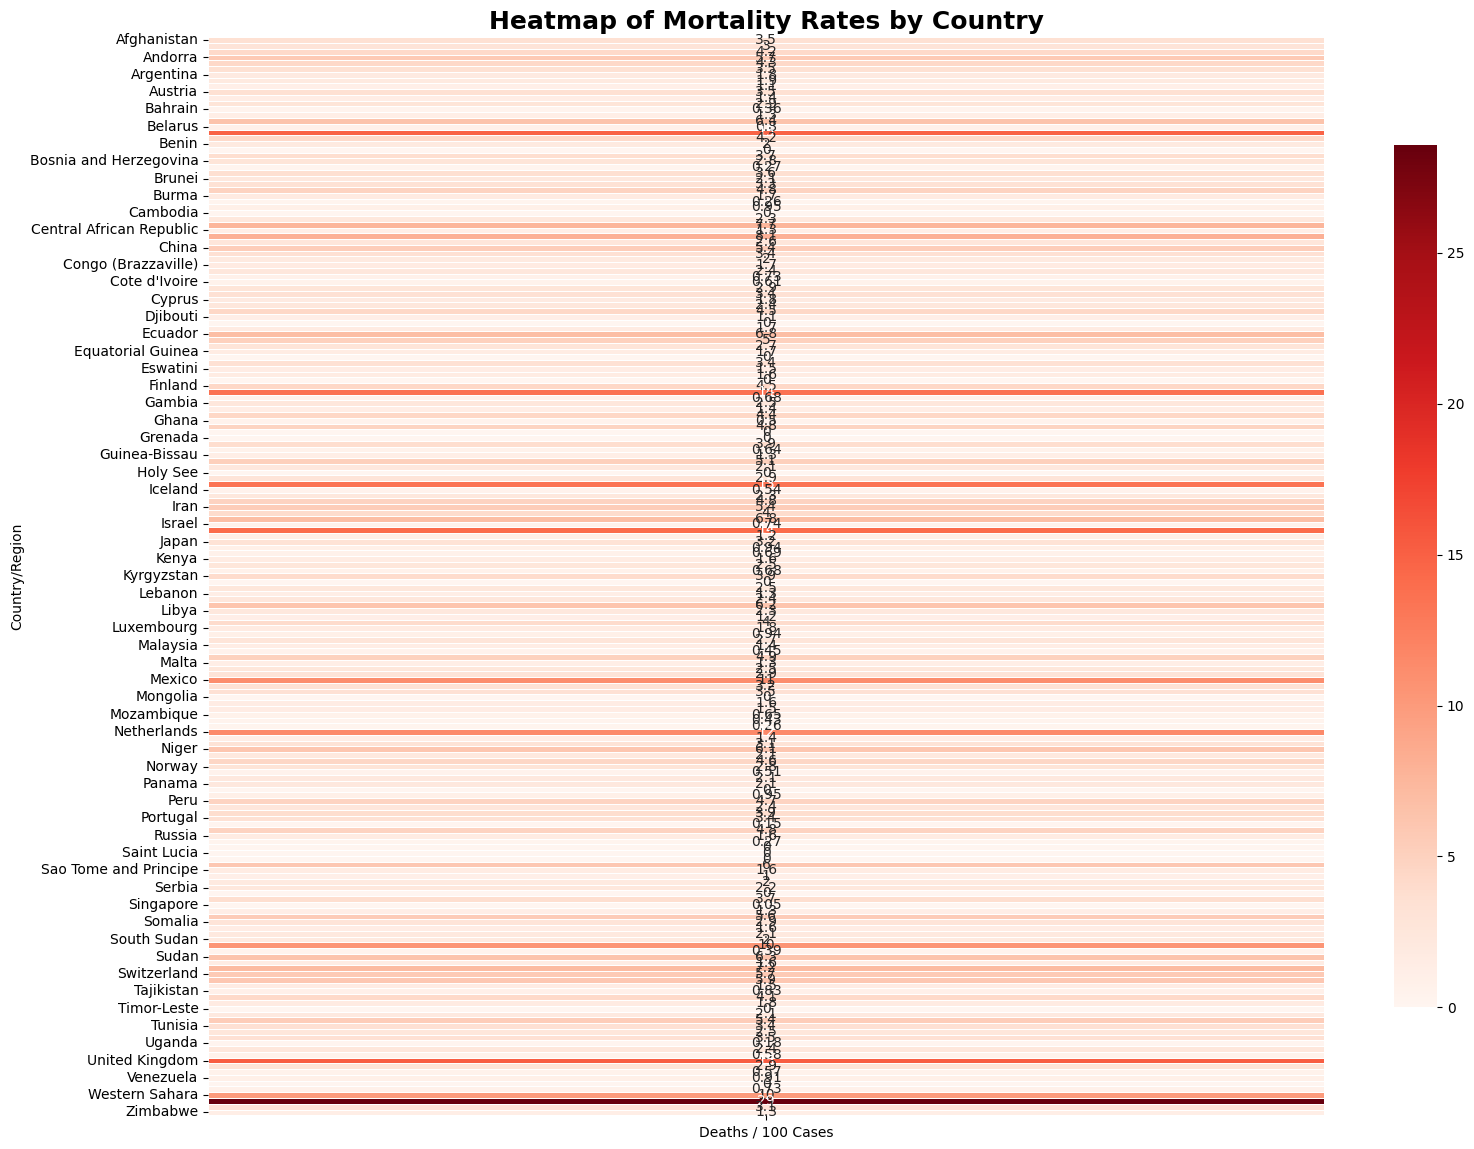

In [19]:
# Heatmap: Mortality rate (Deaths / 100 Cases) across different countries
plt.figure(figsize=(18,14))
mortality_data = Covid_data_clean.pivot_table(values='Deaths / 100 Cases', index='Country/Region', aggfunc='mean')
sns.heatmap(mortality_data, annot=True, cmap="Reds", linewidths=0.5, cbar_kws={'shrink': 0.8})
# Rotate the labels for better readability
plt.yticks(rotation=0)  # Adjust the y-axis labels if needed
plt.title('Heatmap of Mortality Rates by Country',fontsize=18, fontweight='bold')
plt.show()

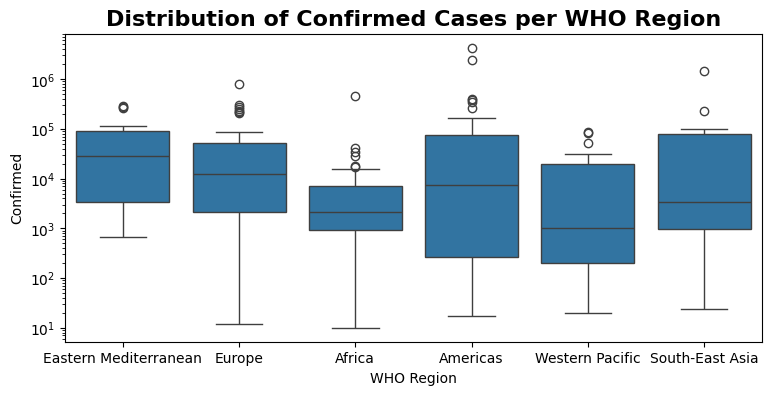

In [20]:
# Box plot: Distribution of Confirmed Cases per WHO Region
plt.figure(figsize=(9,4))
sns.boxplot(x='WHO Region', y='Confirmed', data=Covid_data_clean)
plt.yscale('log')  # Log scale for better visibility
plt.title('Distribution of Confirmed Cases per WHO Region',fontsize=16, fontweight='bold')
plt.show()

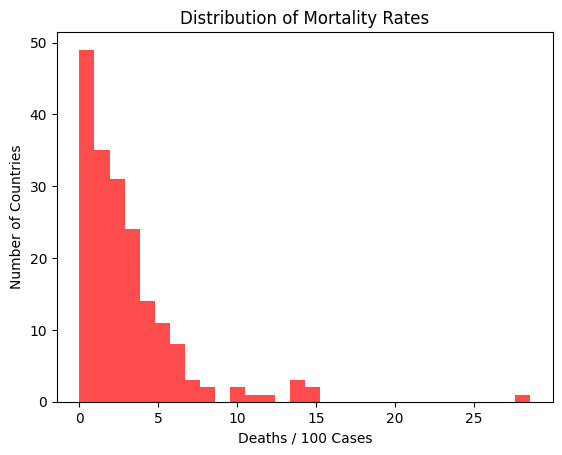

In [21]:
plt.hist(Covid_data_clean['Deaths / 100 Cases'], bins=30, color='red', alpha=0.7)
plt.title('Distribution of Mortality Rates')
plt.xlabel('Deaths / 100 Cases')
plt.ylabel('Number of Countries')
plt.show()


**PREPARING DATA FOR MODELING**

In [22]:
! pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
#! pip install sklearn

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Select the features for the model
features = ['Confirmed', 'Active', 'Recovered', 'Deaths / 100 Cases', 'WHO Region']

# Encode categorical feature (WHO Region) as numeric
Covid_data_clean = pd.get_dummies(Covid_data_clean, columns=['WHO Region'], drop_first=True)

In [26]:
# Define X (features) and y (target)
X = Covid_data_clean[['Confirmed', 'Active', 'Recovered', 'Deaths / 100 Cases']]
y = Covid_data_clean['Deaths']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building the Regression Model

In [27]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 9.299037654991386e-21
R-squared (R²): 1.0


**Improving the Model**

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest MSE: 43347749.684128955
Random Forest R²: 0.4944363052141306


Visualizing Model Predictions

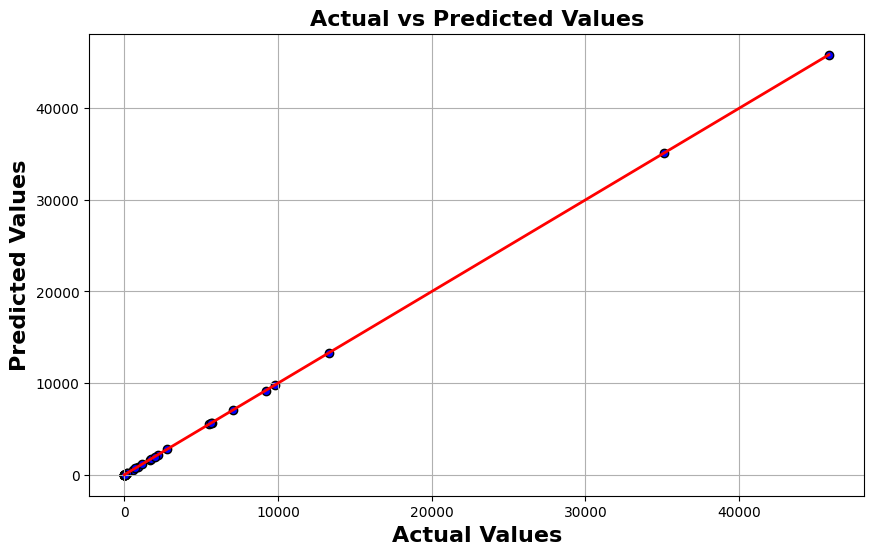

In [30]:
# Assuming y_test are the actual values, and y_pred are the predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line for perfect prediction
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=16, fontweight='bold')
plt.grid(True)
plt.show()

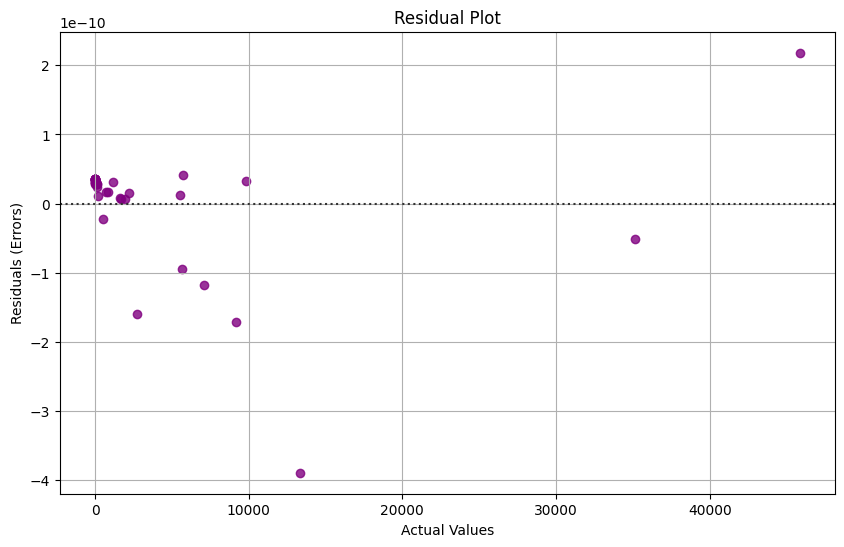

In [31]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_test, y=y_pred, color='purple')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Errors)')
plt.grid(True)
plt.show()


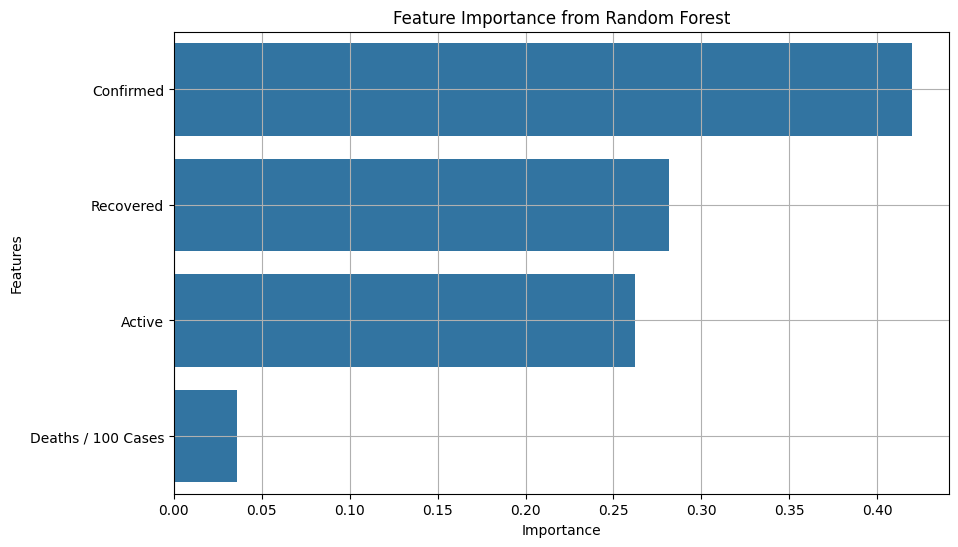

In [32]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns  # assuming X is your feature matrix

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()


**Visualizing EDA Findings**

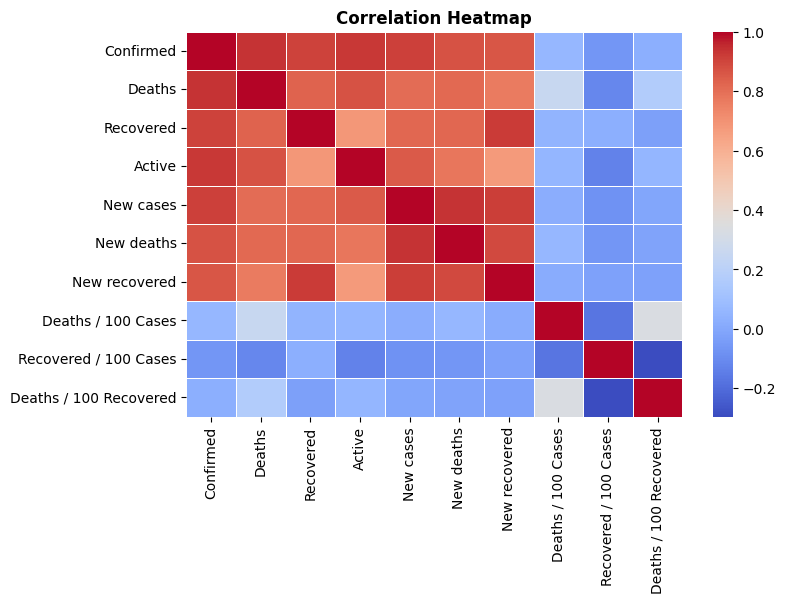

In [33]:
# Select only numeric columns for correlation
numeric_data = Covid_data_clean.select_dtypes(include=[np.number])  # Filter numeric columns

# For the Correlation heatmap
plt.figure(figsize=(8,5))
corr_matrix = numeric_data.corr()  # Calculate correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()


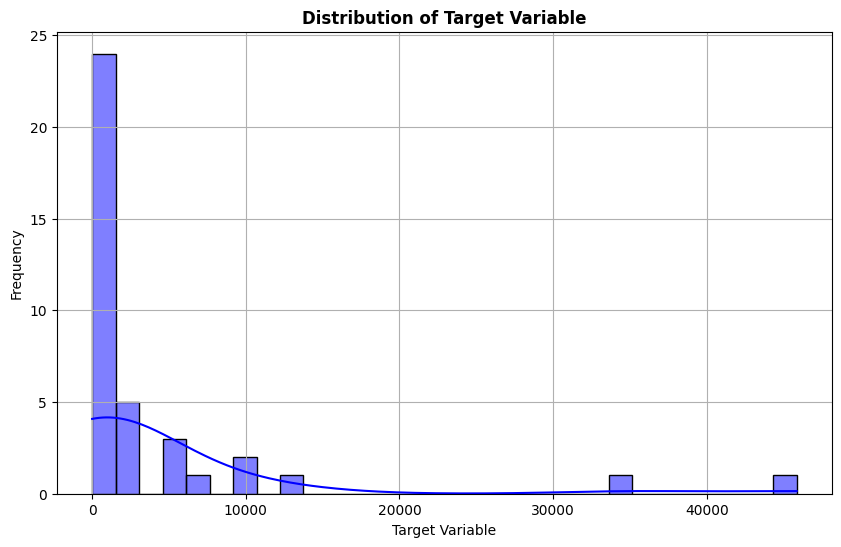

In [34]:
#Distribution Plot of Target Variable
plt.figure(figsize=(10,6))
sns.histplot(y_test, kde=True, color='blue')
plt.title('Distribution of Target Variable', fontweight='bold')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


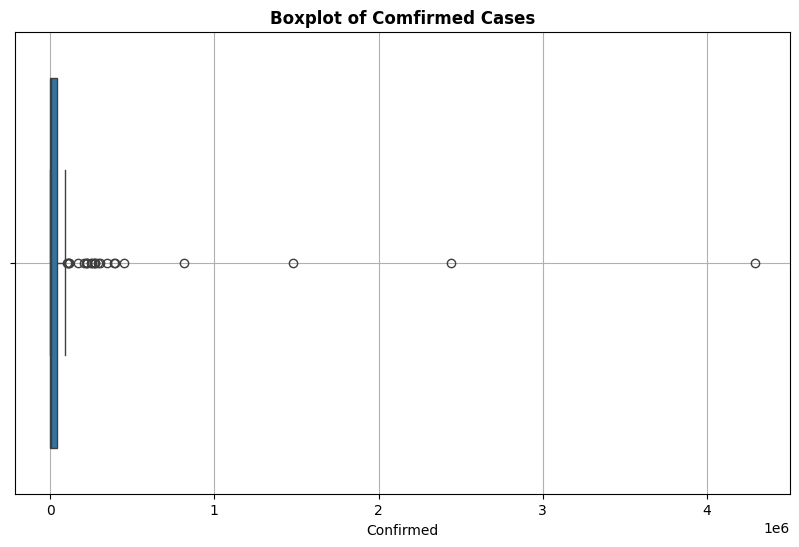

In [35]:
# Boxplot for Outlier Detection
plt.figure(figsize=(10,6))
sns.boxplot(data=Covid_data_clean, x='Confirmed')  
plt.title('Boxplot of Comfirmed Cases', fontweight='bold')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

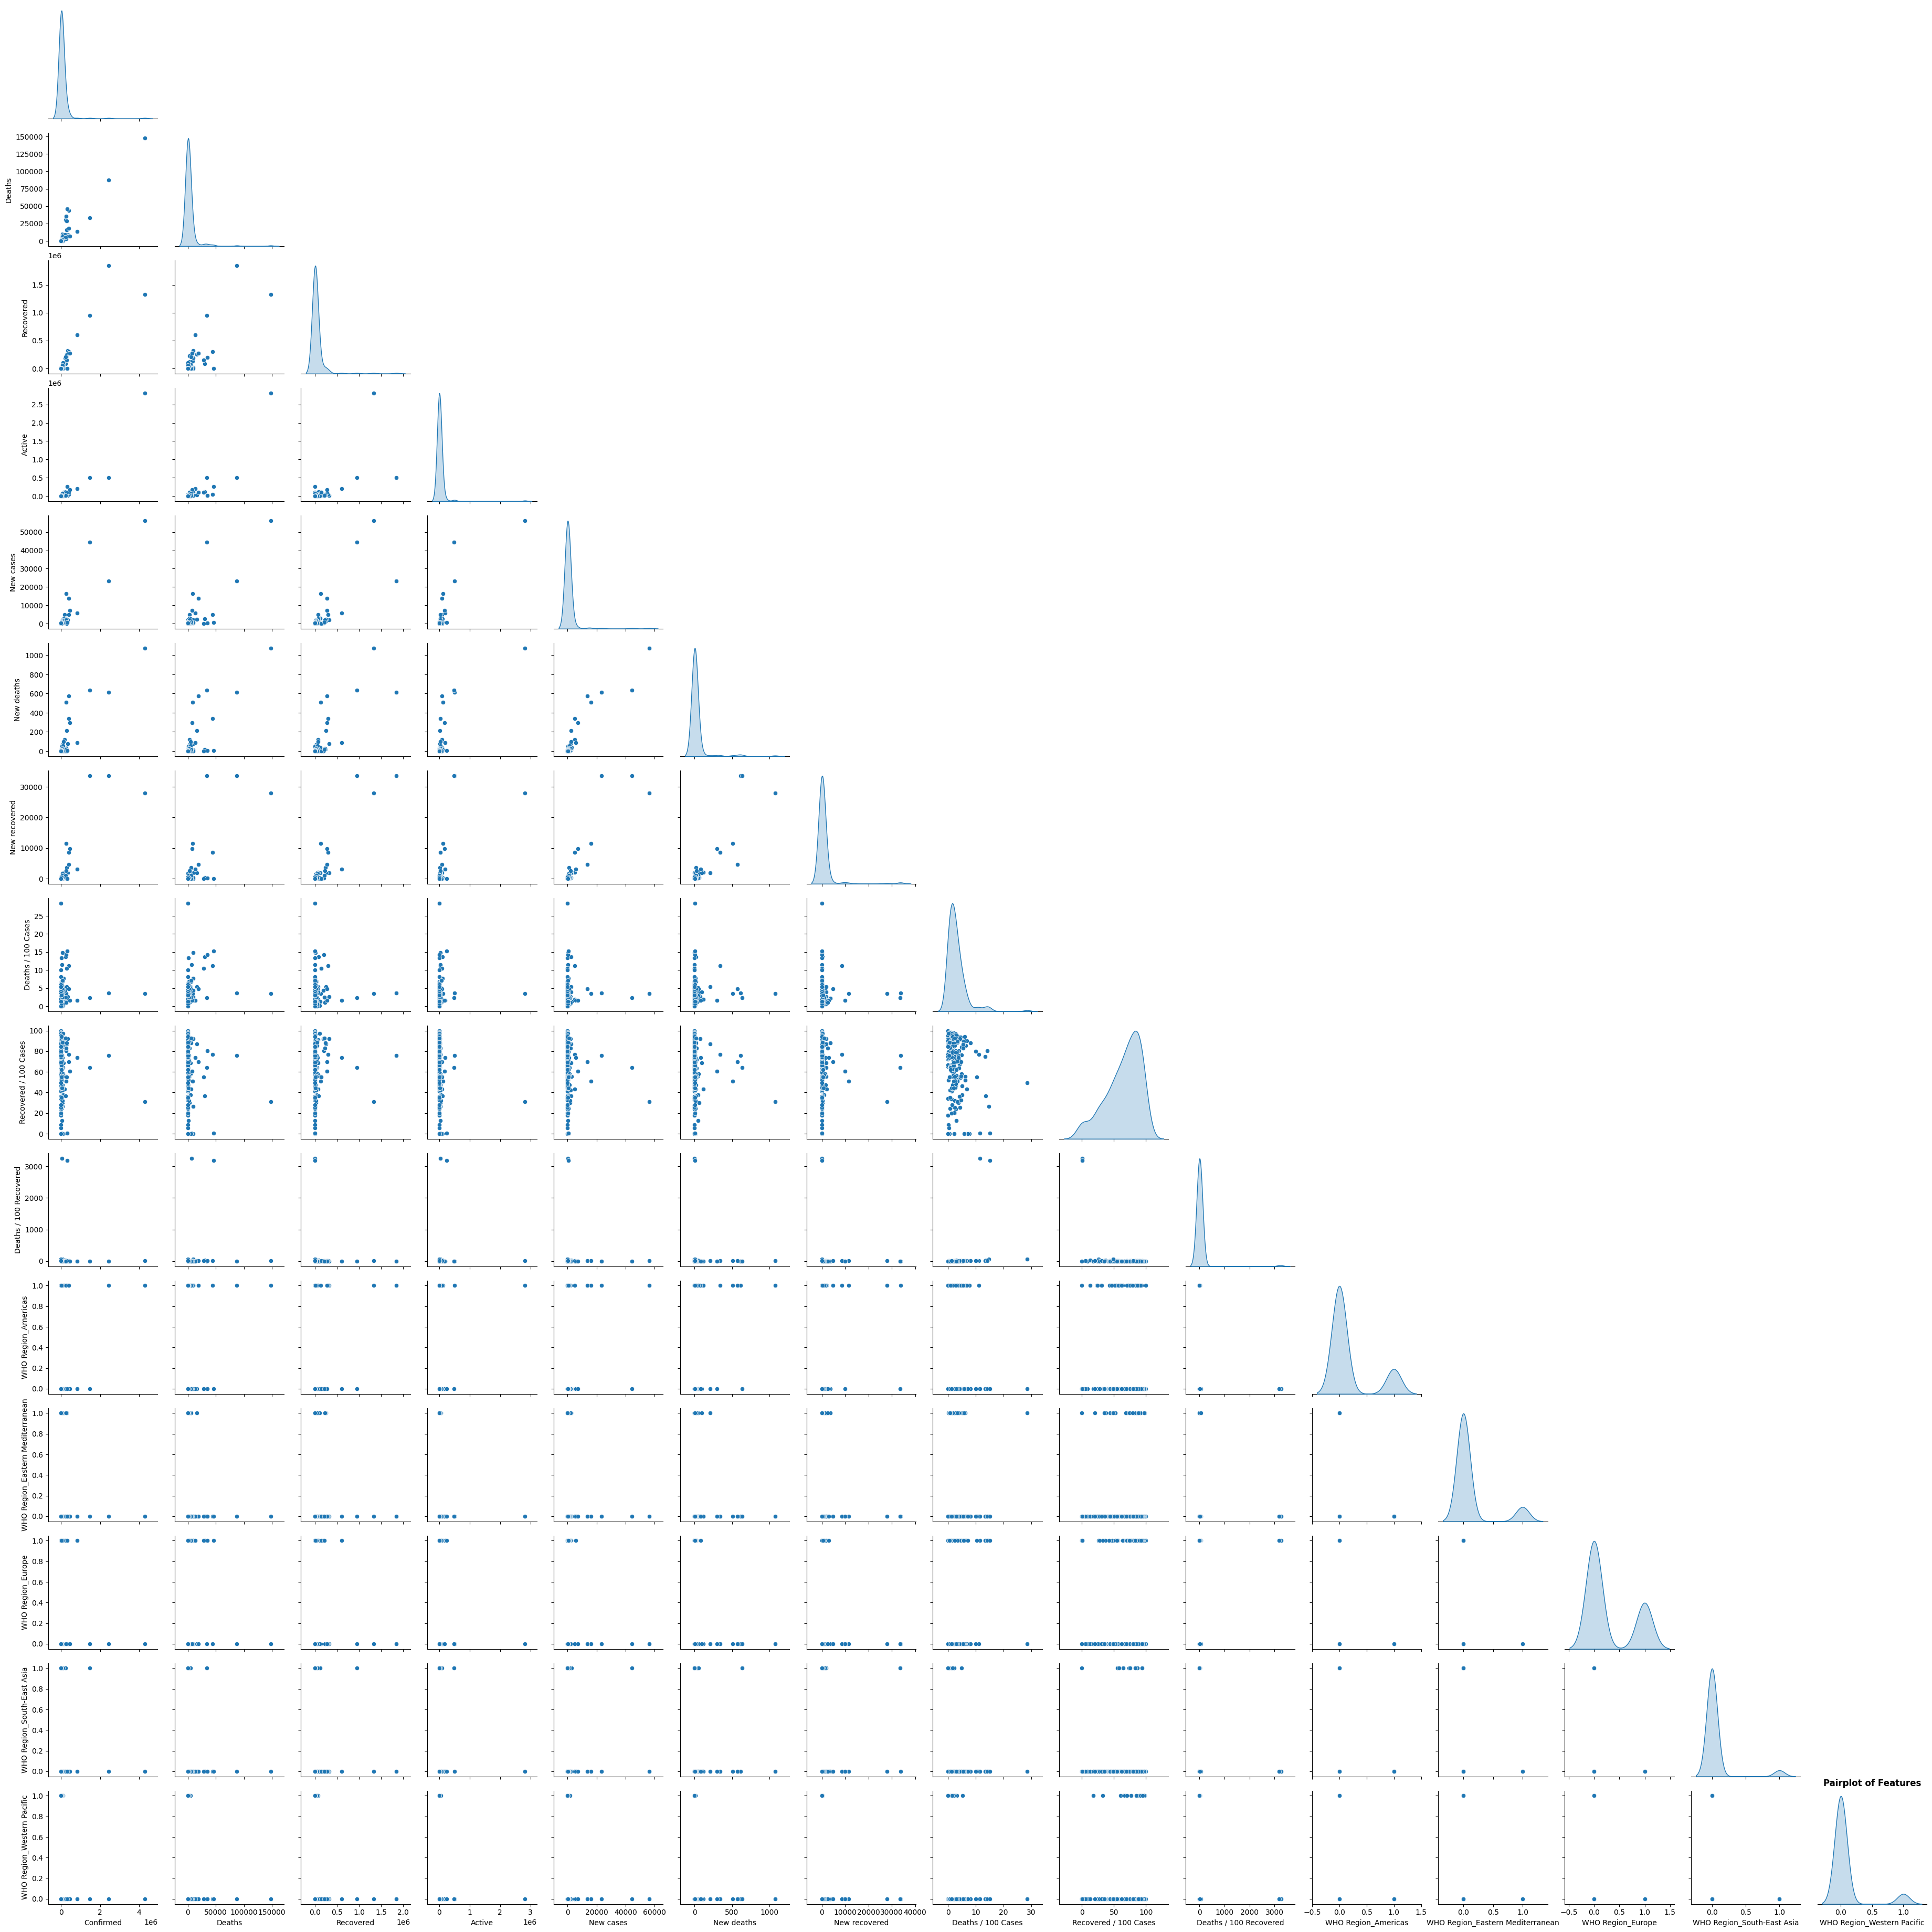

In [40]:
#Pairplot for Multivariate Analysis
plt.figure(figsize=(12,8))
sns.pairplot(Covid_data_clean, diag_kind='kde', corner=True)  # corner=True avoids duplicate plots
plt.title('Pairplot of Features', fontweight='bold')
plt.show()


Comparing Models

Linear Regression MSE: 9.299037654991386e-21
Random Forest MSE: 43347749.684128955


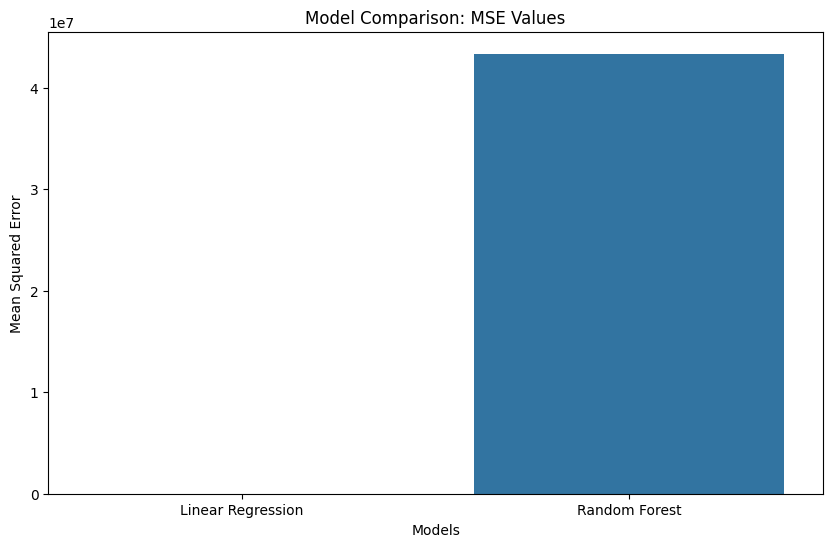

In [38]:
from sklearn.metrics import mean_squared_error

# Assuming you have trained the Linear Regression model and have test data (X_test, y_test)
y_pred_lr = model.predict(X_test)  # Predictions from the trained model

# Calculate MSE for Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)  
print("Linear Regression MSE:", mse_lr)

# Assuming you already have predictions for Random Forest model
y_pred_rf = rf_model.predict(X_test)  # Predictions from the Random Forest model

# Calculate MSE for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)  
print("Random Forest MSE:", mse_rf)


# Now plot the bar chart with MSE values
models = ['Linear Regression', 'Random Forest']
mse_scores = [mse_lr, mse_rf]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=mse_scores)
plt.title('Model Comparison: MSE Values')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

